In [1]:
#importing the required Libraries
import pandas as pd #data Handeling
import numpy as np #Numerical Functions
import seaborn as sns #Advanced plotting
import matplotlib.pyplot as plt #Base plotting

In [4]:
df=pd.read_csv("C:\\Users\\Sanji\\OneDrive\\Documents\\Mini Project\\Sample - Superstore.csv",encoding="latin1")
#Reading the Dataset from the csv file

In [5]:
df.head() 
#Viewing the Head\top 5 records.

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info() 
#checking for any mismatch of Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
df.isnull().sum()
#Checking for any null Values present in the Dataset

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
df=df[df.Sales>0] 
# We remove the Invalid Records ,when sales is 0 ,it means cancelled/test records

In [13]:
def discount_bucket(d):
    if d == 0:
        return "No Discount"
    elif d <= 0.20:
        return "Low Discount"
    elif d <= 0.50:
        return "Medium Discount"
    else:
        return "High Discount"

df["discount_bucket"] = df["Discount"].apply(discount_bucket)
# we are creating Buckets similar to those in SQL

In [18]:
bucket_summary = (df.groupby("discount_bucket").agg(total_sales=("Sales", "sum"),total_profit=("Profit", "sum")))
#Calculating the total Sales and Total Profit for each Discount Bucket by Aggregation

In [16]:
bucket_summary["profit_margin"] = (bucket_summary["total_profit"] / bucket_summary["total_sales"])
# Calculating the Profit Margin for Each Bucket

In [17]:
bucket_summary

,total_sales,total_profit,profit_margin
discount_bucket,,,
High Discount,6.422874e+04,-76559.0513,-1.191975
Low Discount,8.465222e+05,100785.4745,0.119058
Medium Discount,2.985414e+05,-58817.0047,-0.197015
No Discount,1.087908e+06,320987.6032,0.295050


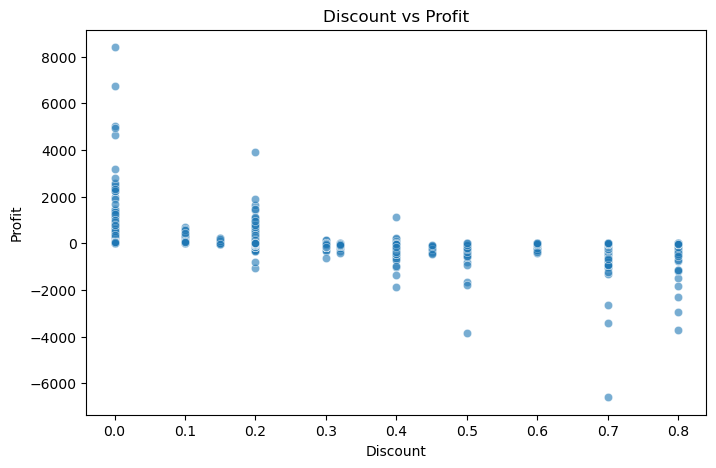

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="Discount",
    y="Profit",
    data=df,
    alpha=0.6
)
plt.title("Discount vs Profit")
plt.show()
# Profit distribution across different discount levels

In [ ]:
# Findings from Scatter Plot:
# 1. As discount increases, profit generally decreases and often turns negative.
# 2. For discounts above 0.4, most transactions result in negative profit.

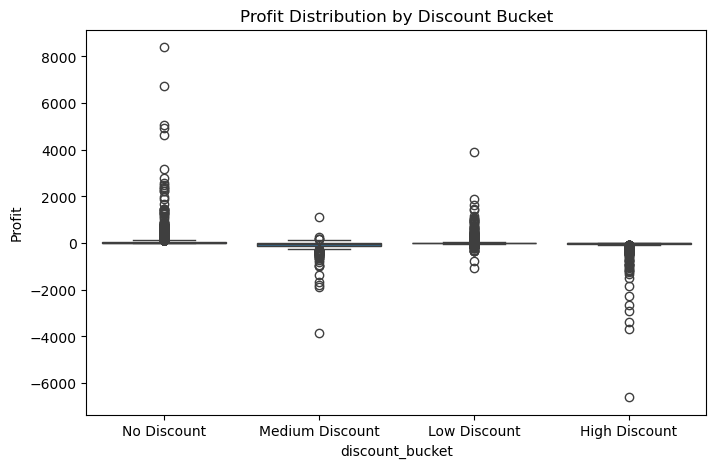

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="discount_bucket",
    y="Profit",
    data=df
)
plt.title("Profit Distribution by Discount Bucket")
plt.show()
#  Profit distribution across different discount Buckets

In [ ]:
# Findings from Box Plot
# 1.Graphical Representation indicates that higher discounts are generally associated with lower profits
# 2.Median Profit shifts downwards

In [22]:
df[["Discount", "Profit"]].corr()
#Correlation Matrix

,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


In [ ]:
# Findings from Correlation :
# There is a negative correlation between discount and profit, indicating that higher discounts are generally associated with lower profits

# Findings
1. Findings confirms that higher discounts are associated with increased profit volatility and losses.

2. Visual analysis shows dense loss clusters at high discount levels.

3. Profit distributions deteriorate significantly beyond medium discount thresholds